# Section 6: Component Separated Maps

As part of DR4 we present component separated maps.  These maps cover about 2100 square degrees and have arcminute-resolution.  

To produce these component separated maps we implemented an internal linear combination (ILC) algorithm.  
The ILC approach uses a linear co-addition of input maps in multiple frequencies to minimize variance of the final map while preserving the signal of interest.  It does so solely by relying on information about the frequency dependence of the various components.  Traditionally the ILC method doesn't explicitly remove any foregrounds, however, our approach works to explicitly null some of the foreground contamination.  It is important to note that, since it is not possible to fully remove foreground contamination, the auto-power spectra of the resulting maps should be interpreted with caution.

Here we demonstrate how to read in and examine the Compton-$y$ and CMB+kSZ maps produced by this process. We also note that it's possible to see galaxy clusters in the Compton-$y$ map by eye and show users how to stack on the locations of clusters.  

We ask that when using these data products you reference the original work: [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717).

Notebook Info | Value
---|---
Dependencies | `numpy`, `scipy`, `healpy`, `matplotlib`, `pixell`, `astropy`
Data products | "tilec_single_tile_deep56_comptony_map_v1.2.0_joint.fits"
| "tilec_single_tile_deep56_cmb_map_v1.2.0_joint.fits"
| "tilec_single_tile_deep56_cmb_deprojects_comptony_map_v1.2.0_joint.fits"
| "D56Clusters.fits"
Memory usage | Low
Contributors | Maya Mallaby-Kay, Zach Atkins

To return to the main notebook or to view a different section use the links in the table of contents.

## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Overview and Introduction

> [Section 2](Section_2_coadded_maps.ipynb): Coadded maps from [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  The DR5 Cluster Catalog from [Hilton et al (2020)](https://arxiv.org/abs/2009.11043) and Visualizing Objects in the Maps

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al (2020)](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_power_spectra_part_1.ipynb): Power Spectra Part 1 - Harmonic Analysis using CAR maps [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf)

> [Section 8](Section_8_power_spectra_part_2.ipynb) Power Spectra Part 2 - Power Spectrum example using Nawrapper [Aiola et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_A20.pdf) and [Choi et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_C20.pdf) 

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code

> [Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. (2020)](https://arxiv.org/pdf/2007.14405.pdf)
 
---

## Initialize notebook

We begin by importing Pixell and other neccesary functions by running the introductory notebook.

We will also define a function `eshow` that plots CAR maps for us.  This function is introduced in the section 2 Notebook originally.

In [20]:
%run Section_1_Introduction.ipynb

from astropy.io import fits
import astropy.units as u

def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

---
Table 4: Component Separated Maps
---
Map Type| File Name
---|---
CMB+kSZ maps| 
Map | tilec_single_tile_D56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint.fits 
Beam | tilec_single_tile_D56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_beam.txt 
Noise | tilec_single_tile_D56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_noise.fits
Cross-Noise |	tilec_single_tile_D56_cmb{_deprojects_comptony,_deprojects_cib}_comptony_map_v1.2.0_joint_cross_noise.fits 
Weights | tilec_single_tile_D56_cmb{,_deprojects_comptony,_deprojects_cib}_map_v1.2.0_joint_ARRAY_weight.fits 
| 
tSZ/Compton-Y maps| |
Map | tilec_single_tile_D56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint.fits 
Beam | tilec_single_tile_D56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_beam.txt 
Noise | tilec_single_tile_D56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_noise.fits 
Cross-Noise | tilec_single_tile_D56_comptony{_deprojects_comptony,_deprojects_cib}_comptony_map_v1.2.0_joint_cross_noise.fits 
Weights | tilec_single_tile_D56_comptony{,_deprojects_cmb,_deprojects_cib}_map_v1.2.0_joint_ARRAY_weight.fits 
|
Mask |tilec_mask.fits
 



These maps are named according to the Deep56 region.  To access the Boss region instead simply substitute 'BN' for 'D56' in the names above.

Notice that the map, beam, noise and weights come in options that do not deproject anything, or that deproject another component. The former probably should be your baseline, and the latter should be used for systematics tests since they are noisier.

In the above, the most important products for your analysis are 'Map' and 'Beam'. 'Map' is a FITS file with a 2D array and a WCS header. 'Beam' is an ASCII file with two columns, the first corresponding to multipole number and the second corresponding to the effective beam transfer function in the map.

'Noise' contains the 2D Fourier space total noise power spectrum from the ILC pipeline (this includes both signal and instrument noise). 'Cross-noise' is the total cross-power-spectrum of the standard ILC map (no deprojection) with one of the deprojected ILC maps, as estimated by the ILC pipeline. This cross-power spectrum is useful as an input to filters used in CMB lensing reconstruction.

The 'Weights' FITS file contains the 2D Fourier space weight for each pixel corresponding to the detector array.

The 'mask' is an apodized mask with values ranging from 0 to 1. It has already been applied
to the map. All maps in a given directory use this same mask. If you are doing a real-space analysis,
you should exclude any pixels where the value in the mask is appreciably different from 1 since
the signal there should be attenuated by the value in the mask.

If you are doing a harmonic-space analysis, you should apply an overall correction to your
power spectrum of the form 1/mean(mask1 * mask2) (or equivalent for spherical harmonics).
(Note: Mode-coupling is probably unimportant for the Compton-Y map since the spectrum is not
very red. Mode-coupling can be important for the CMB map, but it's unlikely that you will
need to directly cross-correlate the CMB map in harmonic space. If you do, then
get in touch with us about how to handle the mode-coupling, since during reconstruction of
these maps, the mask was applied prior to a series of Fourier operations, and many 
power spectrum codes assume the mask has not yet been applied.)

In [29]:
# Here we demonstrate how to read in the deep 56 compton y map.  This is the same region 
# we looked at with the lensing map in the previous section
path="/Users/reneehlozek/Code/DR4_DR5_Notebooks_SURP/Data/"
comptony = enmap.read_map(path + "tilec_single_tile_D56_comptony_map_v1.2.0_joint.fits")

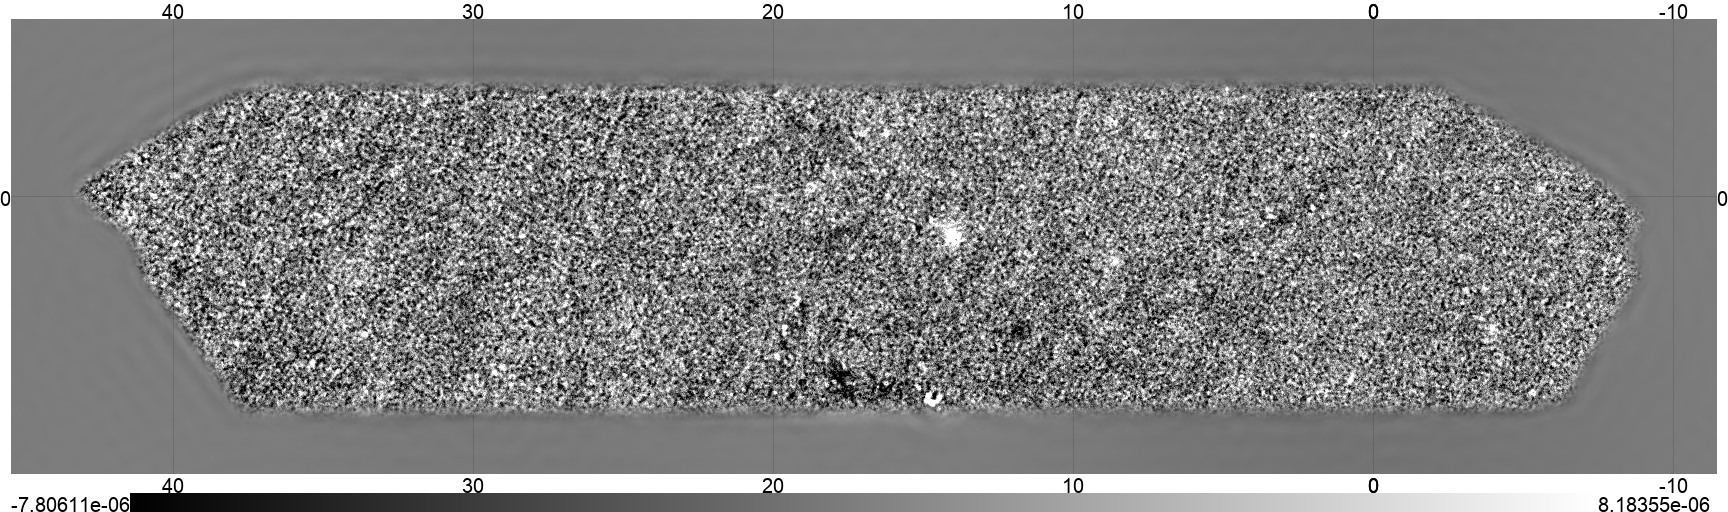

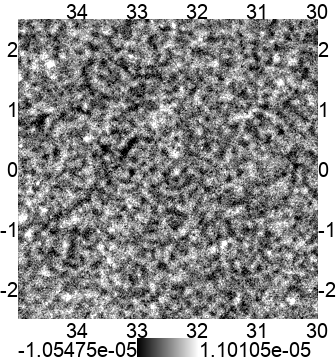

In [22]:
# We can plot the whole region - again adjust the 'downgrade' option to get a larger
# or smaller map
eshow(comptony, **{'downgrade': 4, 'ticks': 10, 'color': 'gray', 'colorbar': True})

# We can also look at a 'submap' using the 'sub' option in order to see more detail
eshow(comptony, **{"sub": "-2.5:2.5 ,35:30", "downgrade": 2, "color": "gray", "colorbar": True})

## Stacking on clusters

One of the interesting things to look at with component-separated maps are the maps stacked at the locations of tSZ-clusters.  In particular we can compare the CMB+kSZ maps stacked at these locations to the CMB+kSZ maps with the tSZ effect deprojected. 

We can begin by reading in the relevant maps, in this case we want to consider the CMB+kSZ and the CMB+kSZ-Compton $y$-deprojected maps for the D56 region.  We will use the ACT + Planck maps in order to recreate stacks that are analogous to those shown in  figure 10 of [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717).


In [23]:
# Start by reading in the two relevant maps:
CMB_kSZ_D56 = enmap.read_map(path + "tilec_single_tile_D56_cmb_map_v1.2.0_joint.fits")
CMB_kSZ_deproject_tsz_D56 = enmap.read_map(path + "tilec_single_tile_D56_cmb_deprojects_comptony_map_v1.2.0_joint.fits")
mask=enmap.read_map(path +"masks/compsep_masks/" + "act_dr4.01_s14s15_D56_compsep_mask.fits")

Let's reuse our stacking code from earlier but apply the method to our two CMB+kSZ maps

In [24]:
hdu  = fits.open(path + 'E-D56Clusters.fits')
ras  = hdu[1].data['RADeg']
decs = hdu[1].data['DECDeg']
sn   = hdu[1].data["SNR"]

N = len(ras)
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0

for i in range(N):
    # Extract stamps by reprojecting the map at the center of each source.
    
    stamp = reproject.thumbnails(CMB_kSZ_D56 ,coords = np.deg2rad([decs[i], ras[i]]),r = 15*np.pi/180/60)
    stamp_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_D56 ,coords = np.deg2rad([decs[i], ras[i]]), r = 15*np.pi/180/60)
    
    if stamp is None or stamp_deproject is None: continue
    
    stack_CMB_kSZ += stamp 
    stack_CMB_kSZ_deproject += stamp_deproject
    c += 1
    

# Normalize the stamps
stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

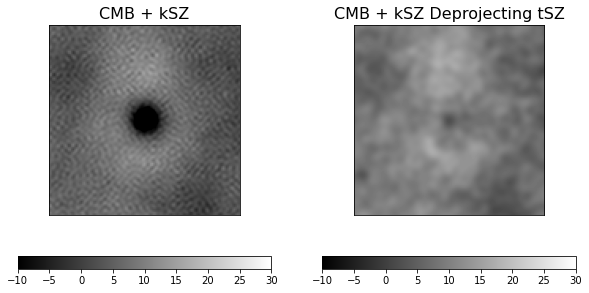

In [25]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ, vmin = -10, vmax = 30, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject, vmin = -10, vmax = 30, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

As explained in [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717), the normal ILC procedure leaves behind large tSZ residuals as is evident in the left hand panel.  In comparison explicitly deprojecting the tSZ frequency massively reduces this residual.  

The slight difference we see between this and [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717) is due to the fact that in this example we are using a publicly available catalog instead of the more up to date one used in [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717).  The public catalog contains much more massive clusters which results in a slight, but visible, residual that could be the result of dust or a large kSZ fluctuation in this sample. The statistical significance of this residual would need to be studied with simulations, but may well be negligible.

### Next step: Stacking on peaks


The first thing to do is identify the peaks in the distribution.


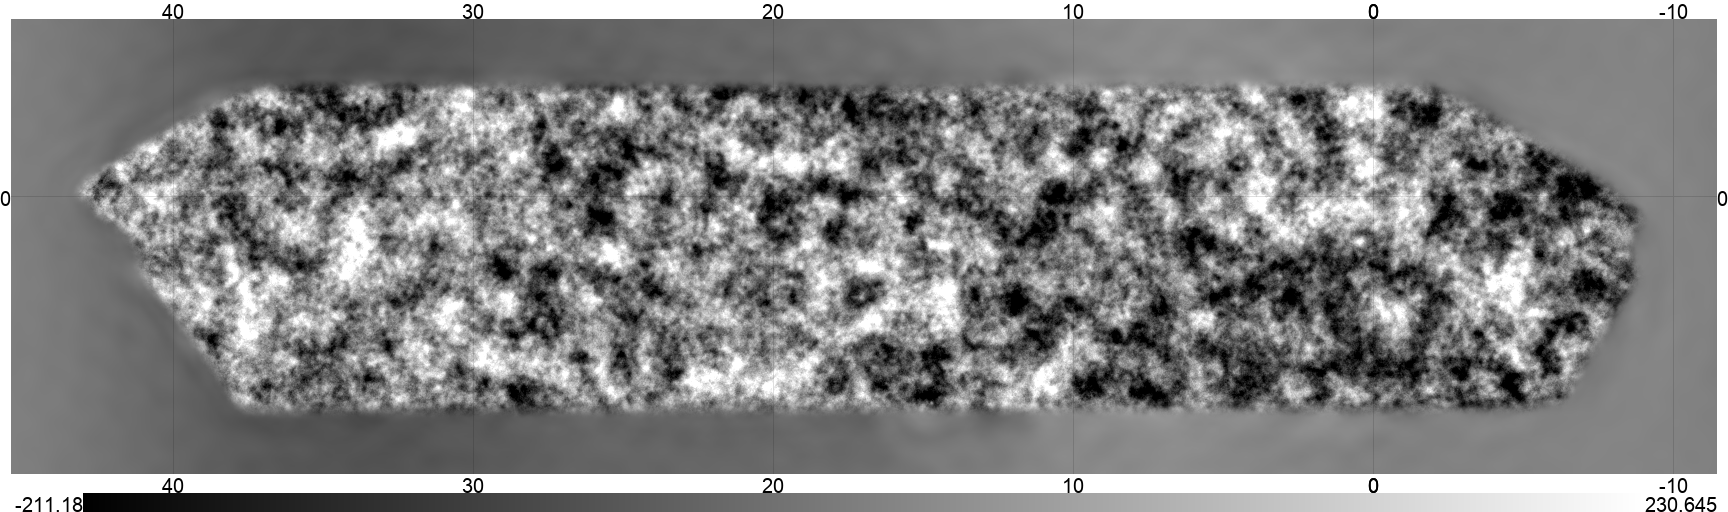

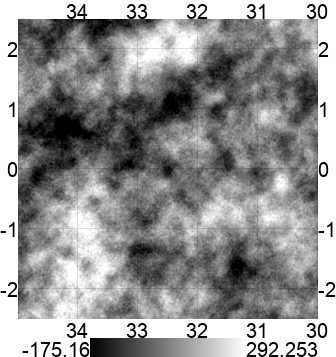

In [26]:
eshow(CMB_kSZ_deproject_tsz_D56, **{'downgrade': 4, 'ticks': 10, 'color': 'gray', 'colorbar': True})
eshow(CMB_kSZ_deproject_tsz_D56, **{"sub": "-2.5:2.5 ,35:30", "downgrade": 2, "color": "gray", "colorbar": True})



In [27]:
CMB_kSZ_deproject_tsz_D56 = enmap.read_map(path + "tilec_single_tile_D56_cmb_deprojects_comptony_map_v1.2.0_joint.fits")
mask=enmap.read_map(path +"masks/compsep_masks/" + "act_dr4.01_s14s15_D56_compsep_mask.fits")
maxmap=np.max(CMB_kSZ_deproject_tsz_D56)
minmap=np.min(CMB_kSZ_deproject_tsz_D56)
stdmap=np.std(CMB_kSZ_deproject_tsz_D56)
meanmap=np.mean(CMB_kSZ_deproject_tsz_D56)

toplimit = maxmap-stdmap
bottomlimit=minmap+stdmap
print(maxmap,minmap, stdmap, toplimit,bottomlimit)
ids_low = np.where(CMB_kSZ_deproject_tsz_D56[:]<bottomlimit)
ids_high = np.where(CMB_kSZ_deproject_tsz_D56[:]>toplimit)
print(np.shape(ids_high)[1], np.shape(ids_low)[1])

474.9677538577569 -424.69216895980554 83.14035717757098 391.8273966801859 -341.55181178223455
224 1434


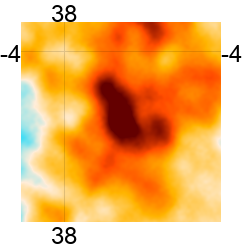

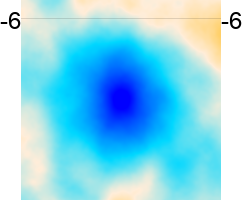

In [28]:

# Set the size of the stamp:
r_arcmin = 10.  #Define the radius of the image in arcminutes
r = r_arcmin*np.pi/(60 * 180)  # convert arcminutes to radians 

pixel_width=100
# Create the box and use it to select a submap
#box = [[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]]
stack_map_high           = 0
for count in range(np.shape(ids_high)[1]):
    x = ids_high[0][count]
    y=ids_high[1][count]
    maskval = mask[x,y]
    if maskval >0.9:
        #eshow(smap_2, **{ "ticks": 2, "range": 300, "font_size":24})
        stack_map_high+= CMB_kSZ_deproject_tsz_D56[x-pixel_width:x+pixel_width, y-pixel_width:y+pixel_width]     
    else: 
        print(maskval)
        print('point %i, %i outside map boundary'%(x,y))

stack_map_high/=count

eshow(stack_map_high, **{ "ticks": 2, "range": 300, "font_size":24})


stack_map_low           = 0
for count in range(np.shape(ids_low)[1]):
    x = ids_low[0][count]
    y=ids_low[1][count]
    maskval = mask[x,y]
    if maskval >0.9:
        #eshow(smap_2, **{ "ticks": 2, "range": 300, "font_size":24})
        stack_map_low+= CMB_kSZ_deproject_tsz_D56[x-pixel_width:x+pixel_width, y-pixel_width:y+pixel_width]     
    else: 
        print(maskval)
        print('point %i, %i outside map boundary'%(x,y))

stack_map_low/=count

eshow(stack_map_low, **{ "ticks": 2, "range": 300, "font_size":24})